In [ ]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib.font_manager 임포트
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")


Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
폰트 설정 완료


In [ ]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('/content/data_nation(2019-2024).csv')

# 자원 리스트
resources = [
    '산화니켈.수입물량', '산화니켈.수출물량',
    '산화리튬.수입물량', '산화리튬.수출물량',
    '수산화코발트.수입물량', '수산화코발트.수출물량',
    '이산화망간.수입물량', '이산화망간.수출물량',
    '탄산리튬.수입물량', '탄산리튬.수출물량',
    '황산니켈.수입물량', '황산니켈.수출물량',
    '황산코발트.수입물량', '황산코발트.수출물량'
]

# 자원별 국가 비중 계산
resource_share = {}

for resource in resources:
    total = data[resource].sum()
    resource_share[resource] = data.groupby('국가')[resource].sum() / total * 100


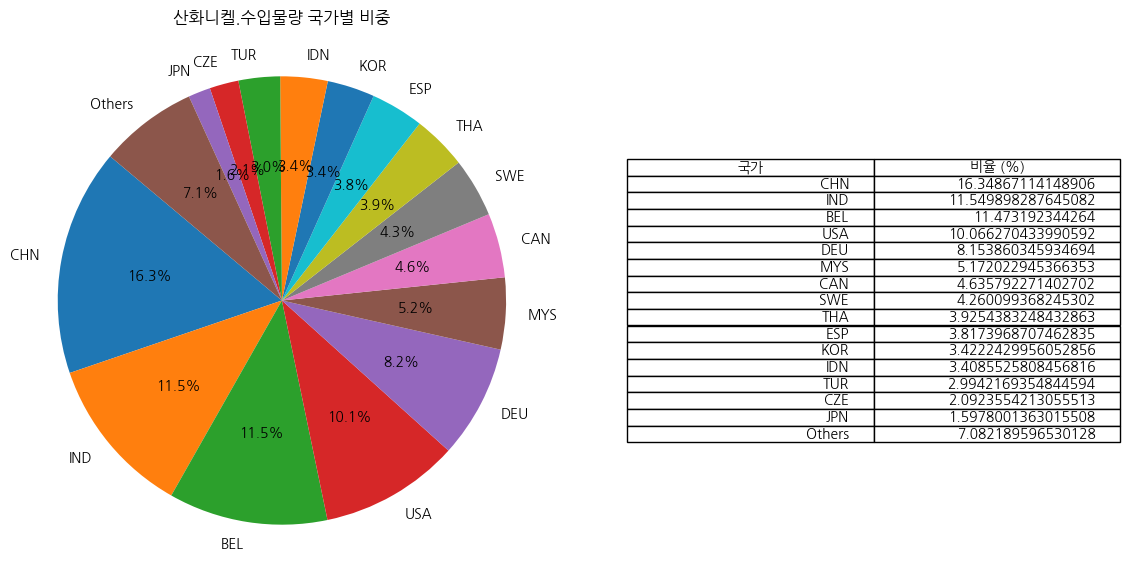

In [ ]:
import matplotlib.pyplot as plt

# 상위 15개 국가만 표시하는 원형 그래프 그리기 함수
def plot_pie_chart_with_table(resource, share_data):
    share_data = share_data.sort_values(ascending=False)
    top_15 = share_data[:15]
    others = share_data[15:].sum()

    labels = list(top_15.index) + ['Others']
    sizes = list(top_15.values) + [others]

    # 원형 그래프
    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'{resource} 국가별 비중')

    # 비율 표 출력
    plt.subplot(1, 2, 2)
    table_data = pd.DataFrame({'국가': labels, '비율 (%)': sizes})
    plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
    plt.axis('off')

    plt.show()

# 예시: 산화니켈 수입물량에 대한 국가별 비중
plot_pie_chart_with_table('산화니켈.수입물량', resource_share['산화니켈.수입물량'])


In [ ]:
for resource in resources:
    plot_pie_chart_with_table(resource, resource_share[resource])


Output hidden; open in https://colab.research.google.com to view.

## 산화니켈 수입물량 국가별 비중
중국 (CHN) - 16.3%
인도 (IND) - 11.5%
벨기에 (BEL) - 11.5%
미국 (USA) - 10.1%
독일 (DEU) - 8.2%
말레이시아 (MYS) - 5.2%
캐나다 (CAN) - 4.6%
스웨덴 (SWE) - 4.3%
태국 (THA) - 3.9%
스페인 (ESP) - 3.8%
한국 (KOR) - 3.4%
인도네시아 (IDN) - 3.4%
터키 (TUR) - 3.0%
체코 (CZE) - 2.1%
일본 (JPN) - 1.6%
기타 (Others) - 7.1%

## 산화니켈 수출물량 국가별 비중
호주 (AUS) - 56.0%
중국 (CHN) - 29.8%
일본 (JPN) - 2.3%
프랑스 (FRA) - 1.7%
인도 (IND) - 1.5%
말레이시아 (MYS) - 1.4%
스웨덴 (SWE) - 1.1%
캐나다 (CAN) - 0.9%
벨기에 (BEL) - 0.8%
네덜란드 (NLD) - 0.7%
스페인 (ESP) - 0.6%
한국 (KOR) - 0.5%
인도네시아 (IDN) - 0.5%
필리핀 (PHL) - 0.5%
체코 (CZE) - 0.4%
기타 (Others) - 1.4%

## 산화리튬 수입물량 국가별 비중
한국 (KOR) - 33.1%
일본 (JPN) - 33.1%
스페인 (ESP) - 6.5%
프랑스 (FRA) - 4.6%
캐나다 (CAN) - 2.6%
중국 (CHN) - 2.4%
스웨덴 (SWE) - 2.0%
인도 (IND) - 1.7%
영국 (GBR) - 1.3%
네덜란드 (NLD) - 1.2%
터키 (TUR) - 1.2%
미국 (USA) - 1.1%
남아프리카 공화국 (ZAF) - 1.1%
가나 (GHA) - 0.9%
호주 (AUS) - 0.9%
기타 (Others) - 6.3%

## 산화리튬 수출물량 국가별 비중
중국 (CHN) - 43.7%
캐나다 (CAN) - 20.2%
미국 (USA) - 9.6%
칠레 (CHL) - 6.0%
스위스 (CHE) - 5.1%
스페인 (ESP) - 4.1%
네덜란드 (NLD) - 3.0%
러시아 (RUS) - 2.6%
영국 (GBR) - 1.5%
오스트레일리아 (AUS) - 0.8%
에스토니아 (EST) - 0.6%
일본 (JPN) - 0.5%
벨기에 (BEL) - 0.4%
가나 (GHA) - 0.4%
남아프리카 공화국 (ZAF) - 0.3%
기타 (Others) - 1.2%

## 수산화코발트 수입물량 국가별 비중
나미비아 (NAM) - 23.8%
잠비아 (ZMB) - 19.6%
캐나다 (CAN) - 18.9%
스페인 (ESP) - 9.8%
독일 (DEU) - 5.2%
한국 (KOR) - 5.0%
말레이시아 (MYS) - 2.7%
브라질 (BRA) - 2.7%
벨기에 (BEL) - 2.2%
미국 (USA) - 1.8%
터키 (TUR) - 1.6%
일본 (JPN) - 1.0%
중국 (CHN) - 0.9%
프랑스 (FRA) - 0.8%
이탈리아 (ITA) - 0.6%
기타 (Others) - 3.9%

## 수산화코발트 수출물량 국가별 비중
콩고 민주 공화국 (COD) - 77.1%
나미비아 (NAM) - 8.1%
남아프리카 공화국 (ZAF) - 7.0%
캐나다 (CAN) - 2.6%
잠비아 (ZMB) - 1.8%
스페인 (ESP) - 0.9%
중국 (CHN) - 0.8%
벨기에 (BEL) - 0.6%
영국 (GBR) - 0.5%
이탈리아 (ITA) - 0.2%
한국 (KOR) - 0.1%
말레이시아 (MYS) - 0.1%
네덜란드 (NLD) - 0.04%
미국 (USA) - 0.04%
파키스탄 (PAK) - 0.03%
기타 (Others) - 0.1%

## 이산화망간 수입물량 국가별 비중
독일 (DEU) - 16.4%
미국 (USA) - 6.8%
볼리비아 (BOL) - 5.9%
칠레 (CHL) - 5.0%
영국 (GBR) - 4.6%
스페인 (ESP) - 4.2%
프랑스 (FRA) - 3.4%
가나 (GHA) - 2.8%
터키 (TUR) - 2.4%
캐나다 (CAN) - 2.3%
중국 (CHN) - 2.2%
폴란드 (POL) - 2.1%
일본 (JPN) - 1.7%
멕시코 (MEX) - 1.7%
나이지리아 (NGA) - 1.7%
기타 (Others) - 36.9%

## 이산화망간 수출물량 국가별 비중
중국 (CHN) - 40.1%
독일 (DEU) - 13.8%
스페인 (ESP) - 5.6%
영국 (GBR) - 4.5%
그리스 (GRC) - 4.2%
폴란드 (POL) - 3.2%
싱가포르 (SGP) - 3.0%
미국 (USA) - 3.0%
가나 (GHA) - 2.5%
벨기에 (BEL) - 2.5%
캐나다 (CAN) - 2.3%
인도네시아 (IDN) - 1.6%
말레이시아 (MYS) - 1.4%
이탈리아 (ITA) - 1.2%
홍콩 (HKG) - 1.1%
기타 (Others) - 10.0%

## 탄산리튬 수입물량 국가별 비중
중국 (CHN) - 44.3%
한국 (KOR) - 15.3%
일본 (JPN) - 10.9%
미국 (USA) - 6.2%
독일 (DEU) - 5.3%
네덜란드 (NLD) - 3.3%
영국 (GBR) - 2.4%
러시아 (RUS) - 2.3%
벨기에 (BEL) - 2.2%
스페인 (ESP) - 1.9%
캐나다 (CAN) - 1.7%
프랑스 (FRA) - 1.1%
인도 (IND) - 0.6%
오스트레일리아 (AUS) - 0.4%
이탈리아 (ITA) - 0.3%
기타 (Others) - 1.7%

## 탄산리튬 수출물량 국가별 비중
칠레 (CHL) - 64.0%
중국 (CHN) - 5.0%
영국 (GBR) - 4.9%
독일 (DEU) - 4.8%
네덜란드 (NLD) - 3.9%
스페인 (ESP) - 3.5%
미국 (USA) - 3.3%
벨기에 (BEL) - 2.4%
캐나다 (CAN) - 1.9%
한국 (KOR) - 1.4%
아르헨티나 (ARG) - 1.1%
볼리비아 (BOL) - 0.8%
프랑스 (FRA) - 0.5%
이탈리아 (ITA) - 0.5%
모잠비크 (MOZ) - 0.3%
기타 (Others) - 1.5%

## 황산니켈 수입물량 국가별 비중
일본 (JPN) - 33.7%
중국 (CHN) - 17.5%
캐나다 (CAN) - 7.5%
벨기에 (BEL) - 6.4%
독일 (DEU) - 6.2%
말레이시아 (MYS) - 4.8%
오스트레일리아 (AUS) - 3.7%
영국 (GBR) - 2.4%
터키 (TUR) - 2.2%
필리핀 (PHL) - 1.9%
한국 (KOR) - 1.8%
이탈리아 (ITA) - 1.1%
체코 (CZE) - 1.0%
슬로베니아 (SVN) - 1.0%
브라질 (BRA) - 1.0%
기타 (Others) - 7.8%

## 황산니켈 수출물량 국가별 비중
남아프리카 공화국 (ZAF) - 29.7%
독일 (DEU) - 13.2%
벨기에 (BEL) - 12.0%
한국 (KOR) - 10.3%
캐나다 (CAN) - 8.4%
미국 (USA) - 3.8%
말레이시아 (MYS) - 3.5%
스웨덴 (SWE) - 2.9%
일본 (JPN) - 2.7%
이탈리아 (ITA) - 2.3%
영국 (GBR) - 2.0%
중국 (CHN) - 1.6%
스페인 (ESP) - 1.2%
키프로스 (CYP) - 1.1%
폴란드 (POL) - 1.0%
기타 (Others) - 3.9%

## 황산코발트 수입물량 국가별 비중
독일 (DEU) - 26.9%
영국 (GBR) - 8.6%
스웨덴 (SWE) - 4.2%
브라질 (BRA) - 4.2%
스위스 (CHE) - 3.7%
슬로바키아 (SVK) - 3.2%
오스트레일리아 (AUS) - 2.9%
터키 (TUR) - 2.8%
루마니아 (ROU) - 2.7%
이탈리아 (ITA) - 2.5%
미국 (USA) - 2.3%
프랑스 (FRA) - 2.1%
헝가리 (HUN) - 2.0%
일본 (JPN) - 2.0%
네덜란드 (NLD) - 1.7%
기타 (Others) - 28.2%

## 황산코발트 수출물량 국가별 비중
독일 (DEU) - 43.3%
스페인 (ESP) - 12.3%
중국 (CHN) - 7.9%
슬로베니아 (SVN) - 5.8%
영국 (GBR) - 4.3%
폴란드 (POL) - 2.4%
캐나다 (CAN) - 2.3%
세르비아 (SRB) - 1.9%
체코 (CZE) - 1.7%
이탈리아 (ITA) - 1.6%
프랑스 (FRA) - 1.4%
인도 (IND) - 1.0%
스위스 (CHE) - 1.0%
노르웨이 (NOR) - 0.9%
스웨덴 (SWE) - 0.9%
기타 (Others) - 11.4%